# 读入数据，数据理解

In [1]:
import pandas as pd
import numpy as np
df_women=pd.read_csv('women.csv',index_col=0,header=0)

# df_women.head(3)
# df_women.columns
df_women.describe()

,height,weight
count,15.000000,15.000000
mean,65.000000,136.733333
std,4.472136,15.498694
min,58.000000,115.000000
25%,61.500000,124.500000
50%,65.000000,135.000000
75%,68.500000,148.000000
max,72.000000,164.000000


# 可视化

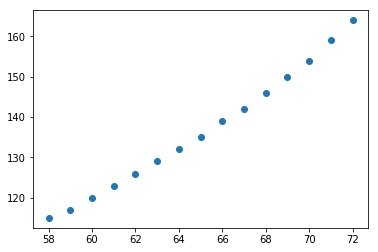

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df_women["height"],df_women["weight"])
plt.show()

# 数据准备

In [3]:
import statsmodels.api as sm
#statsmodels
X = df_women["height"]
y = df_women["weight"]

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# 数据模型选择和参数设置

In [4]:
X_add_const=sm.add_constant(X)
#不加const，只就计算斜率a，不计算b
X_add_const

,const,height
1,1.0,58
2,1.0,59
3,1.0,60
4,1.0,61
5,1.0,62
6,1.0,63
7,1.0,64
8,1.0,65
9,1.0,66
10,1.0,67


In [5]:
myModel = sm.OLS(y,X_add_const)
#数据拟合fit
results= myModel.fit()
print(results.summary())
#AIC、BIC越低越好

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     1433.
Date:                Sun, 21 Jul 2019   Prob (F-statistic):           1.09e-14
Time:                        16:59:01   Log-Likelihood:                -26.541
No. Observations:                  15   AIC:                             57.08
Df Residuals:                      13   BIC:                             58.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -87.5167      5.937    -14.741      0.0

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


# 线性回归的输出

In [6]:
#只显示截距和斜率
results.params
# #只显示r方
# results.rsquared
# results.f_pvalue

const    -87.516667
height     3.450000
dtype: float64

In [29]:
#durbin_watson，残差是否自相关（0-4，4最好）
sm.stats.stattools.durbin_watson(results.resid)

0.3153803748621806

# 进行预测

In [31]:
y_predict=results.predict()
y_predict

array([112.58333333, 116.03333333, 119.48333333, 122.93333333,
       126.38333333, 129.83333333, 133.28333333, 136.73333333,
       140.18333333, 143.63333333, 147.08333333, 150.53333333,
       153.98333333, 157.43333333, 160.88333333])

# 预测结果可视化

Text(0,0.5,'体重')

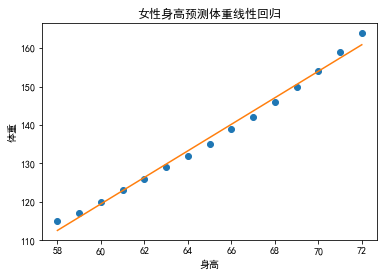

In [35]:
plt.rcParams['font.family']="simHei"
plt.plot(df_women["height"],df_women["weight"],"o")#o代表显示类型
plt.plot(df_women["height"],y_predict)
plt.title('女性身高预测体重线性回归')
plt.xlabel("身高")
plt.ylabel("体重")

# 多项式回归

In [37]:
X=np.column_stack((X,np.power(X,2),np.power(X,3)))
#将x的二次方，三次方加工在一起，满足多项式的输入条件
X_add_const=sm.add_constant(X)
X_add_const

array([[1.00000e+00, 5.80000e+01, 3.36400e+03, 1.95112e+05],
       [1.00000e+00, 5.90000e+01, 3.48100e+03, 2.05379e+05],
       [1.00000e+00, 6.00000e+01, 3.60000e+03, 2.16000e+05],
       [1.00000e+00, 6.10000e+01, 3.72100e+03, 2.26981e+05],
       [1.00000e+00, 6.20000e+01, 3.84400e+03, 2.38328e+05],
       [1.00000e+00, 6.30000e+01, 3.96900e+03, 2.50047e+05],
       [1.00000e+00, 6.40000e+01, 4.09600e+03, 2.62144e+05],
       [1.00000e+00, 6.50000e+01, 4.22500e+03, 2.74625e+05],
       [1.00000e+00, 6.60000e+01, 4.35600e+03, 2.87496e+05],
       [1.00000e+00, 6.70000e+01, 4.48900e+03, 3.00763e+05],
       [1.00000e+00, 6.80000e+01, 4.62400e+03, 3.14432e+05],
       [1.00000e+00, 6.90000e+01, 4.76100e+03, 3.28509e+05],
       [1.00000e+00, 7.00000e+01, 4.90000e+03, 3.43000e+05],
       [1.00000e+00, 7.10000e+01, 5.04100e+03, 3.57911e+05],
       [1.00000e+00, 7.20000e+01, 5.18400e+03, 3.73248e+05]])

In [39]:
myMode_up=sm.OLS(y,X_add_const)
results_up=myMode_up.fit()
print(results_up.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.679e+04
Date:                Thu, 11 Jul 2019   Prob (F-statistic):           2.07e-20
Time:                        15:03:51   Log-Likelihood:                 1.3441
No. Observations:                  15   AIC:                             5.312
Df Residuals:                      11   BIC:                             8.144
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -896.7476    294.575     -3.044      0.0

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


In [41]:
print("查看斜率及截距项",results_up.params)

查看斜率及截距项 const   -896.747633
x1        46.410789
x2        -0.746184
x3         0.004253
dtype: float64


In [42]:
y_predict_up=results_up.predict()
y_predict_up

array([114.63856209, 117.40676937, 120.18801264, 123.00780722,
       125.89166846, 128.86511168, 131.95365223, 135.18280543,
       138.57808662, 142.16501113, 145.9690943 , 150.01585147,
       154.33079796, 158.93944911, 163.86732026])

Text(0,0.5,'体重')

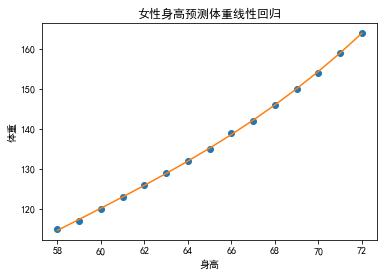

In [43]:
plt.rcParams['font.family']="simHei"
plt.plot(df_women["height"],df_women["weight"],"o")
plt.plot(df_women["height"],y_predict_up)
plt.title('女性身高预测体重线性回归')
plt.xlabel("身高")
plt.ylabel("体重")

# 预测新数据

In [44]:
h=63.5
results_up.predict([1,h,np.power(h,2),np.power(h,3)])

array([130.39340008])